# Non-thermal radiation with naima
In this jupyter notebook we will learn how to use the package naima to build non-thermal emission models. In the previous lectures we made many assumptions: mono-energetic electrons and photons and Thomson limit in the case of Inverse Compton emission. The naima modul can be used for any spectra of particles and photons. It also allows to fit the model to observational data.
You can read more on naima on this web page:
https://naima.readthedocs.io

This Notebook contains 3 exercises for a total of 9 marks. Please submit on Ulwazi.

## Pre-requisites
As usual, we need to import the modules.

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from astropy import units as u
from astropy import constants as c

from numpy import sqrt

From naima we will import only the parts that we will make use of.

In [2]:
from naima.models import Synchrotron, InverseCompton, PionDecay
from naima.models import PowerLaw, ExponentialCutoffPowerLaw

We will look at the total energy ouput of a hypothetical source. We will note yet deal with the flux which can be measured on Earth. So we will ignore the distance to the source. We will do so by using a distance of 0.

In [3]:
d = 0 * u.kpc

## Particle Spectra
For our example we will assume a particle spectrum following a power law with index 2.5, with an amplitude $A$ at a reference energy of 1 TeV and an exponential cut off at an energy of 10 TeV. A power law with an exponential cut-off is given by
$$
f(E) = A \left( \frac{E}{E_0} \right)^{-\Gamma} \times \exp{\left( -\left(\frac{E}{E_\mathsf{cut}}\right)^\alpha \right)} 
$$
We will use $\alpha = 1$ throughout this notebook. This is the default value, we simply ignore it.

In [4]:
A = 1e45/u.TeV
E_0 = 1 * u.TeV
Gamma = 2.5
E_cut = 10 * u.TeV

In [5]:
PL = ExponentialCutoffPowerLaw(A, E_0, Gamma, E_cut)

We want to take a look at the spectrum in an energy range from 511 keV to 100 TeV. (The 511 keV is the electron rest energy.)

In [6]:
np.log10((511*u.keV).to(u.TeV).value)

-6.291579099865287

In [7]:
energies = np.logspace(-6.3,2,801) * u.TeV

In [8]:
N = PL(energies)

Let's make a plot of it:

Text(0, 0.5, 'dN/dE [1 / TeV]')

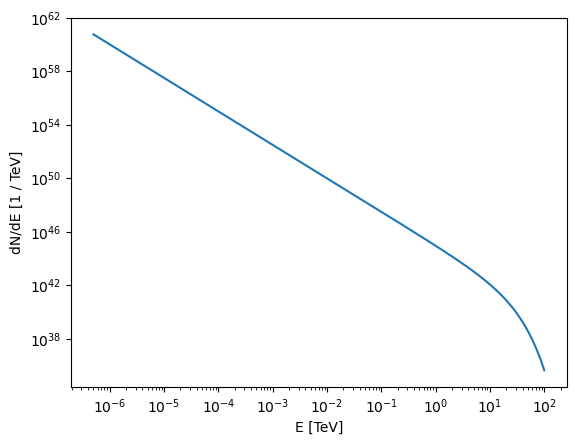

In [9]:
plt.loglog(energies, N)

plt.xlabel('E [{}]'.format(energies.unit))
plt.ylabel('dN/dE [{}]'.format(N.unit))

You see that above $\approx 10\,\mathsf{TeV}$ the spectrum sharply drops off from the straight power law.

Note that this power law object describes only the shape of the spectrum. It tells us how many particles are found at which energy. It does not make any claim on the type of the particle. It can be electrons, protons, photons or anything else.

We can get the total energy stored in these particles by integrating over the number of particles (N) multiplied with the energy (from array energies):

In [10]:
E_tot = np.trapz(N*energies, energies)

In [11]:
E_tot.to(u.erg)

<Quantity 4.52528058e+48 erg>

## Synchrotron Radiation
Naima provides a model for synchrotron radiation. We will use the magnetic field as before.

In [12]:
B = 1e-8 * u.T

We will create a synchrotron model object. The shape of the electron spectrum is given by the power law with cut-off as defined above. We also need to indicate the electron's minimal energy of 511 keV, as this is lower than the default value of 1 GeV.

In [13]:
sync = Synchrotron(PL, B, Eemin = 511*u.keV)

Note that this object has additional parameters. The maximum energy can be given as well (parameter Eemax) and the default value is 510 TeV. The number of points can be changed ro reduce computing time or increase accuracy (parameter nEed, default value 100).

This object allows to calculate the total energy in electrons. This should correspond to our calculation above.

In [14]:
sync.We

<Quantity 4.48080366e+48 erg>

You can also calculate the energy in electrons in a certain energy range, let's say from 100 GeV to 1 TeV:

In [15]:
sync.compute_We(100*u.GeV, 1*u.TeV)

<Quantity 6.71465439e+45 erg>

Let's create an energy range for the photons. This will define the range of the electromagnetic spectrum we want to study. We will study the range from $10^{-19}\,\mathsf{TeV}$ to $100\,\mathsf{TeV}$.

In [16]:
photon_energies = np.logspace(-19,2,211) * u.TeV

With the flux function of the sync object we can get the number of photons produced every second. We have to set the distance to 0, which we have defined as d = 0 above.

In [17]:
flux_sync = sync.flux(photon_energies, distance = d)

In [18]:
flux_sync

<Quantity [1.56993388e+058, 1.04925295e+058, 7.01259714e+057,
           4.68681081e+057, 3.13238963e+057, 2.09350465e+057,
           1.39917443e+057, 9.35124712e+056, 6.24981160e+056,
           4.17699542e+056, 2.79164837e+056, 1.86576538e+056,
           1.24696108e+056, 8.33389951e+055, 5.56984431e+055,
           3.72252153e+055, 2.48788709e+055, 1.66273607e+055,
           1.11125844e+055, 7.42686998e+054, 4.96358475e+054,
           3.31729272e+054, 2.21702572e+054, 1.48168564e+054,
           9.90238090e+053, 6.61791489e+053, 4.42283237e+053,
           2.95581506e+053, 1.97538252e+053, 1.32014605e+053,
           8.82244981e+052, 5.89593134e+052, 3.94013552e+052,
           2.63308500e+052, 1.75959600e+052, 1.17585761e+052,
           7.85759095e+051, 5.25068732e+051, 3.50860105e+051,
           2.34445465e+051, 1.56652917e+051, 1.04670088e+051,
           6.99346852e+050, 4.67247401e+050, 3.12164489e+050,
           2.08545251e+050, 1.39314055e+050, 9.30603572e+049,
        

We can also use the function sed (which stands for spectral energy distribution) to get the energy flux, or with a distance of zero the luminosity of source.

In [19]:
sed_sync = sync.sed(photon_energies, distance = d)

In [20]:
sed_sync

<Quantity [2.51531138e+032, 2.66434581e+032, 2.82220972e+032,
           2.98942607e+032, 3.16654870e+032, 3.35416424e+032,
           3.55289401e+032, 3.76339607e+032, 3.98636737e+032,
           4.22254603e+032, 4.47271380e+032, 4.73769856e+032,
           5.01837708e+032, 5.31567785e+032, 5.63058410e+032,
           5.96413701e+032, 6.31743906e+032, 6.69165761e+032,
           7.08802868e+032, 7.50786085e+032, 7.95253950e+032,
           8.42353122e+032, 8.92238840e+032, 9.45075417e+032,
           1.00103675e+033, 1.06030686e+033, 1.12308046e+033,
           1.18956356e+033, 1.25997405e+033, 1.33454240e+033,
           1.41351229e+033, 1.49714137e+033, 1.58570193e+033,
           1.67948169e+033, 1.77878459e+033, 1.88393158e+033,
           1.99526144e+033, 2.11313163e+033, 2.23791910e+033,
           2.37002119e+033, 2.50985644e+033, 2.65786540e+033,
           2.81451144e+033, 2.98028151e+033, 3.15568678e+033,
           3.34126328e+033, 3.53757231e+033, 3.74520081e+033,
        

You can get the SED by multiplying the flux with the square of the photon energy. Let's try this:

In [21]:
(flux_sync*(photon_energies**2)).to(u.erg/u.s)

<Quantity [2.51531138e+032, 2.66434581e+032, 2.82220972e+032,
           2.98942607e+032, 3.16654870e+032, 3.35416424e+032,
           3.55289401e+032, 3.76339607e+032, 3.98636737e+032,
           4.22254603e+032, 4.47271380e+032, 4.73769856e+032,
           5.01837708e+032, 5.31567785e+032, 5.63058410e+032,
           5.96413701e+032, 6.31743906e+032, 6.69165761e+032,
           7.08802868e+032, 7.50786085e+032, 7.95253950e+032,
           8.42353122e+032, 8.92238840e+032, 9.45075417e+032,
           1.00103675e+033, 1.06030686e+033, 1.12308046e+033,
           1.18956356e+033, 1.25997405e+033, 1.33454240e+033,
           1.41351229e+033, 1.49714137e+033, 1.58570193e+033,
           1.67948169e+033, 1.77878459e+033, 1.88393158e+033,
           1.99526144e+033, 2.11313163e+033, 2.23791910e+033,
           2.37002119e+033, 2.50985644e+033, 2.65786540e+033,
           2.81451144e+033, 2.98028151e+033, 3.15568678e+033,
           3.34126328e+033, 3.53757231e+033, 3.74520081e+033,
        

In [22]:
Eflux_sync = flux_sync * photon_energies

In [23]:
Eflux_sync

<Quantity [1.56993388e+039, 1.32093120e+039, 1.11142175e+039,
           9.35141699e+038, 7.86820701e+038, 6.62024300e+038,
           5.57021372e+038, 4.68672567e+038, 3.94336453e+038,
           3.31790540e+038, 2.79164837e+038, 2.34885945e+038,
           1.97630012e+038, 1.66283156e+038, 1.39908164e+038,
           1.17716467e+038, 9.90445692e+037, 8.33342091e+037,
           7.01156674e+037, 5.89937252e+037, 4.96358475e+037,
           4.17622411e+037, 3.51374897e+037, 2.95635153e+037,
           2.48736562e+037, 2.09276844e+037, 1.76076128e+037,
           1.48141677e+037, 1.24638211e+037, 1.04862928e+037,
           8.82244981e+036, 7.42253779e+036, 6.24469397e+036,
           5.25369527e+036, 4.41990531e+036, 3.71838824e+036,
           3.12816330e+036, 2.63157745e+036, 2.21377760e+036,
           1.86226652e+036, 1.56652917e+036, 1.31771834e+036,
           1.10839007e+036, 9.32281131e+035, 7.84121744e+035,
           6.59477988e+035, 5.54619241e+035, 4.66406630e+035,
        

We can integrate over Eflux to get the total power in synchrotron radiation.

In [24]:
P_sync = (np.trapz(Eflux_sync, photon_energies)).to(u.erg/u.s)

In [25]:
P_sync

<Quantity 2.27916091e+35 erg / s>

We can make a plot of the synchrotron radiation. Usually the SED is plotted in astrophysical publications.

(1e+24, 1e+36)

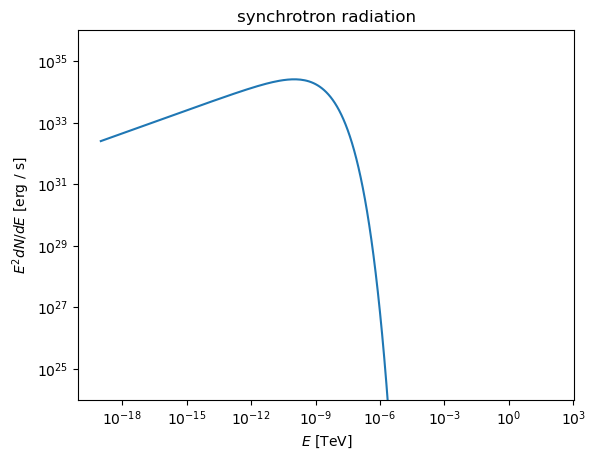

In [26]:
plt.loglog(photon_energies, sed_sync)

plt.title('synchrotron radiation')

plt.xlabel('$E$ [{}]'.format(photon_energies.unit))
plt.ylabel('$E^2 dN/dE$ [{}]'.format(sed_sync.unit))

plt.ylim(1e24, 1e36)

## Inverse Compton Emission
Similarly, you can also get the IC emission of these electrons. There several predefined photon fields in naima. You can also define your own photon field. For the moment we deal only with photons of the Cosmic Microwave Background (CMB).

In [27]:
photon_fields = ['CMB']

In [28]:
IC = InverseCompton(PL, photon_fields, Eemin = 511*u.keV)

This works exactly as the synchrotron object, so we can do the same tests as above.

In [29]:
IC.We

<Quantity 4.48080366e+48 erg>

In [30]:
flux_ic = IC.flux(photon_energies, distance = d)

sed_ic = IC.sed(photon_energies, distance = d)

Eflux_ic = flux_ic * photon_energies

In [31]:
P_IC = (np.trapz(Eflux_ic, photon_energies)).to(u.erg/u.s)

In [32]:
P_IC

<Quantity 2.20345207e+32 erg / s>

This is the power radiated from Inverse Compton scattering. This is much lower than what we have calculated for the synchrotron radiation. Keep in mind, that ususally the cooling is synchrotron dominated.

Let's try to calculate the magnetic field from the power in synchrotron and inverse Compton emission. The equation from lecture slide 12 of "Inverse Compton II" is 
$$
B = \sqrt{ \frac{u_\mathsf{rad} P_\mathsf{sync} 2 \mu_0}{P_\mathsf{IC}} }
$$
where $u_\mathsf{rad} = 0.25\,\mathsf{eV}/\mathsf{cm}^3$ is the energy density of the CMB photon field.

In [33]:
B_measured = sqrt(0.25*u.eV/u.cm**3 * P_sync * 2 * c.mu0 / P_IC)

In [34]:
B_measured.to(u.T)

<Quantity 1.02042437e-08 T>

This is the vaule we have put into our model!

Let's make a plot of the Inverse Compton emission.

Text(0, 0.5, '$E^2 dN/dE$ [erg / s]')

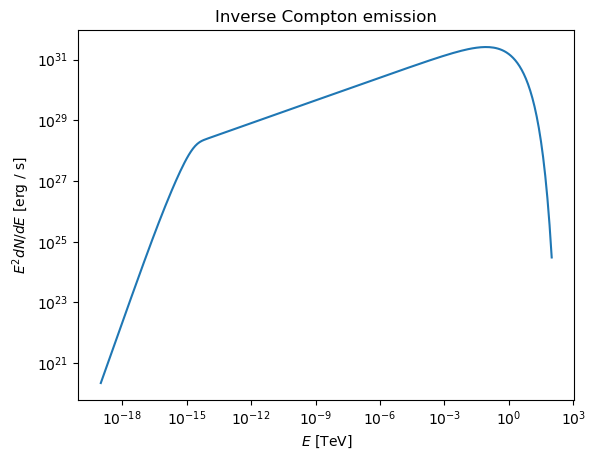

In [35]:
plt.loglog(photon_energies, sed_ic)

plt.title('Inverse Compton emission')

plt.xlabel('$E$ [{}]'.format(photon_energies.unit))
plt.ylabel('$E^2 dN/dE$ [{}]'.format(sed_ic.unit))

Note the break at lower energies. This is due to the minimum energy of 511 keV. You can test this yourself. We can safely ignore this, this is at levels that we cannot measure anyway.

## Combined Plot
We can show both emissions in one plot. This is the SED of the source.

(1e+29, 1e+36)

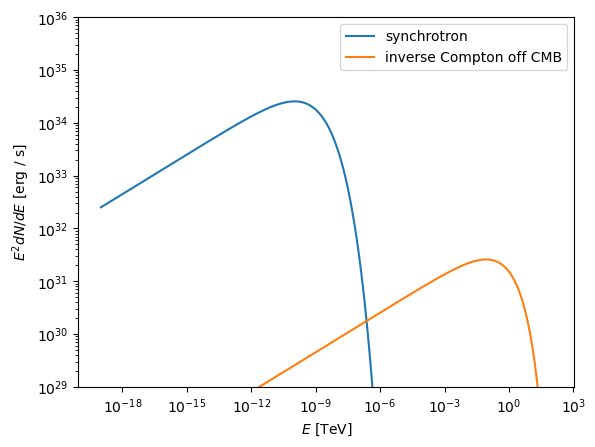

In [36]:
plt.loglog(photon_energies, sed_sync, label='synchrotron')
plt.loglog(photon_energies, sed_ic, label='inverse Compton off CMB')

plt.legend()
plt.xlabel('$E$ [{}]'.format(photon_energies.unit))
plt.ylabel('$E^2 dN/dE$ [{}]'.format(sed_ic.unit))

plt.ylim(1e29, 1e36)

You can also sum up the two components and show the total emission.

In [37]:
sed_sum = sed_sync + sed_ic

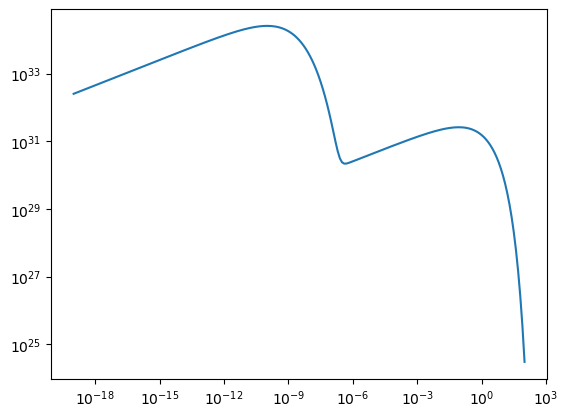

In [38]:
plt.loglog(photon_energies, sed_sum)

### Exercise
We keep the electron spectrum as it is. We want to understand what is happening when we increase or decrease the magnetic field. Plot the total emission (synchrotron and inverse Compton emission) for the cases of $10^{-7}\,\mathsf{T}$, $10^{-8}\,\mathsf{T}$ and $10^{-9}\,\mathsf{T}$.

**[3 marks]**

In [40]:
Bs = [1e-7,1e-8,1e-9] *u.T

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(1e+29, 1e+38)

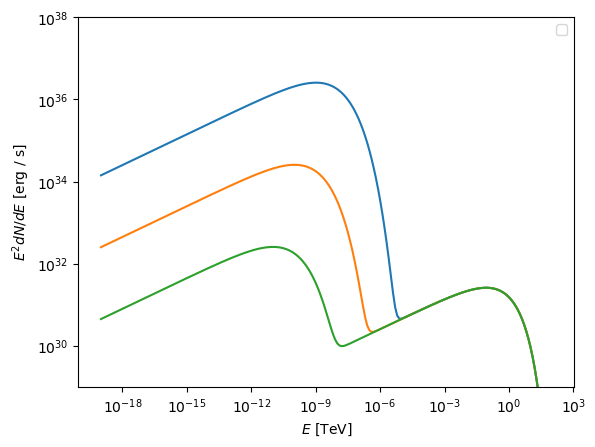

In [43]:
# your code here
for Bloop in Bs:
    sync = Synchrotron(PL, Bloop, Eemin = 511*u.keV)
    sed_sync = sync.sed(photon_energies, distance = d)
    sed_sum = sed_sync + sed_ic
    plt.loglog(photon_energies, sed_sum)
plt.legend()
plt.xlabel('$E$ [{}]'.format(photon_energies.unit))
plt.ylabel('$E^2 dN/dE$ [{}]'.format(sed_ic.unit))

plt.ylim(1e29, 1e38)

Expected output:


## Hadronic emission
Naima also provides a model for gamma-ray production through pion decay in inelastic proton-proton collisions. The only parameter is the target material density, we will use 1 particle per cm$^3$.

In [44]:
n = 1./ u.cm**3

We will define a new spectrum for the protons and keep the same parameters. (We could use the same as above, but we want to be sure that we do not mix up the different particles.)

In [45]:
PL_protons = ExponentialCutoffPowerLaw(A, E_0, Gamma, E_cut)

In [46]:
had = PionDecay(PL_protons, n)

Similar to what was done above we can calculate the total energy in protons. As we are talking about protons now we have to call Wp:

In [47]:
had.Wp

<Quantity 9.00294846e+46 erg>

This is what we have put in above. But for protons this might be a bit low. For a supernova remnant for example we are expecting up to $10^{50}\,\mathsf{erg}$ which is about 10% of the explosion energy. We can set the total energy in the PionDecay object:

In [48]:
had.set_Wp(1e50*u.erg)

In [49]:
had.Wp

<Quantity 1.e+50 erg>

This worked. This changed the amplitude of our spectrum. Let's check:

In [50]:
PL_protons.amplitude

<Quantity 1.11074722e+48 1 / TeV>

Now we can do the same steps as above:

In [51]:
flux_had = had.flux(photon_energies, distance = d)

sed_had = had.sed(photon_energies, distance = d)

Eflux_had = flux_had * photon_energies

In [52]:
P_had = (np.trapz(Eflux_had, photon_energies)).to(u.erg/u.s)

In [53]:
P_had

<Quantity 1.21090822e+34 erg / s>

(1e-06, 1122.018454301963)

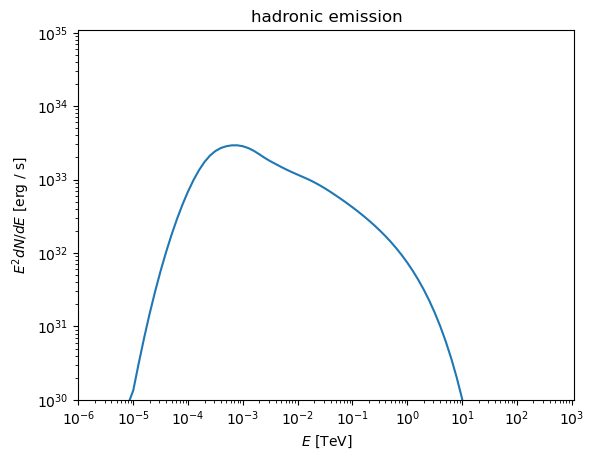

In [54]:
plt.loglog(photon_energies, sed_had)

plt.title('hadronic emission')

plt.xlabel('$E$ [{}]'.format(photon_energies.unit))
plt.ylabel('$E^2 dN/dE$ [{}]'.format(sed_ic.unit))

plt.ylim(1e30)
plt.xlim(1e-6)

You see the characteristic turn-over at lower energies due to the pion mass. The cut-off at high energies is due to the break in the proton spectrum.

### Exercise
We keep the proton spectrum as it is. We want to understand what is happening when we increase or decrease the density. Plot the hadronic emission for the cases of $1\,\mathsf{cm}^{-3}$, $10\,\mathsf{cm}^{-3}$ and $100\,\mathsf{cm}^{-3}$.

**[3 marks]**

In [55]:
densities = [1, 10, 100]/u.cm**3

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(1e-06, 1122.018454301963)

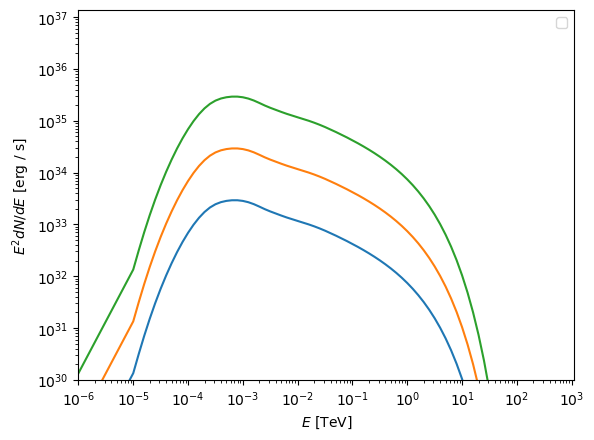

In [56]:
# your code here
for density in densities:
    had = PionDecay(PL_protons, density)
    sed_had = had.sed(photon_energies, distance = d)
    plt.loglog(photon_energies, sed_had)
plt.legend()
plt.xlabel('$E$ [{}]'.format(photon_energies.unit))
plt.ylabel('$E^2 dN/dE$ [{}]'.format(sed_had.unit))

plt.ylim(1e30)
plt.xlim(1e-6)

Expected output:


### Exercise
We keep the amplitude of the proton spectrum as it is and the density at $1\,\mathsf{cm}^{-3}$. We want to understand what is happening when we change the spectral index. Plot the hadronic emission for spectral indices of 2, 2.3 and 2.6.

**[3 marks]**

In [57]:
n = 1/u.cm**3
SpecIndx = [2, 2.3, 2.6]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(1e-06, 1122.018454301963)

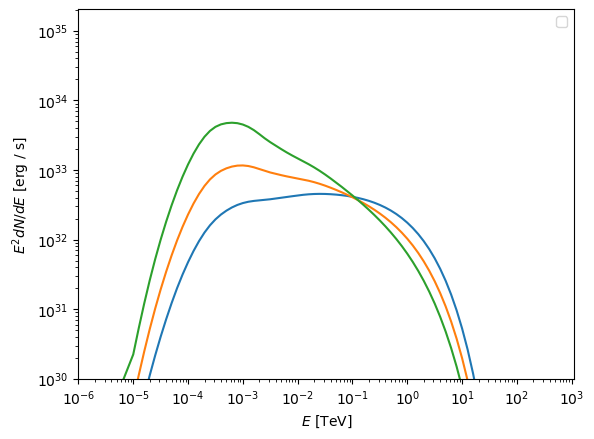

In [58]:
# your code here
A = PL_protons.amplitude
for index in SpecIndx:
    PL_protons = ExponentialCutoffPowerLaw(A, E_0, index, E_cut)
    had = PionDecay(PL_protons, n)
    sed_had = had.sed(photon_energies, distance = d)
    plt.loglog(photon_energies, sed_had)
plt.legend()
plt.xlabel('$E$ [{}]'.format(photon_energies.unit))
plt.ylabel('$E^2 dN/dE$ [{}]'.format(sed_had.unit))


plt.ylim(1e30)
plt.xlim(1e-6)

Expected output:


## Submission

Before you submit your work you should make a few checks that everything works fine.

1. Save your notebook as a PDF (File->Download As->PDF). This document will help you debugging in the next step.
1. If PDF export does not work: You can do File->Print Preview and then print to a file.
1. Restart the kernel and rerun the entire notebook (Kernel->Restart & Run All). This will delete all variables (but not your code) and rerun the notebook in one go. If this does not go through the endthen you have to fix it. You will see at which cell the run stopped. A common mistake is using a variable that is defined only at a later stage.
1. You think you fixed everything? Redo step 2 (Kernel->Restart & Run All)

You have to download and submit 2 files, the jupyter notebook and a pdf.
- Jupyter notebook. File->Download As->Notebook (.ipynb). Save this file on your disk.
- PDF file. File->Download As->PDF. Save this file on your disk.
- If PDF export does not work. You can do File->Print Preview and then print to a file.

Please submit the two files on Ulwazi.